In [185]:
import warnings
warnings.filterwarnings("ignore")

#import libraries and modules
import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###

In [186]:
df=pd.read_csv('UCI-electricity/UCI_data.csv') # Reading the data and displaying sample rows
df.sample(5, random_state=999)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
1292,2016-03-07 01:20:00,19.79,37.363333,17.426667,39.790000,20.100000,38.933333,20.100000,36.790000,17.600000,62.940000,-0.300,76.800000,17.89,31.790000,21.200,43.990000,17.6000,38.363333,0.133333,747.666667,97.666667,1.000000,51.333333,-0.200000,10.672942,10.672942,60
8973,2016-05-18 07:50:00,23.29,41.900000,21.225714,44.147143,24.390000,38.560000,23.066667,39.590000,21.657143,47.768571,13.900,32.933333,23.20,39.466667,23.390,42.738571,22.6000,42.875556,11.633333,752.866667,81.500000,2.666667,25.833333,8.516667,27.619852,27.619852,70
4158,2016-05-18 09:40:00,23.39,42.900000,23.542857,40.825714,24.290000,38.966667,23.290000,40.333333,21.238571,46.342857,19.050,3.547500,23.00,38.590000,23.254,43.156000,22.6000,41.834000,14.433333,752.233333,71.666667,4.000000,26.666667,9.400000,8.850150,8.850150,80
3538,2016-03-11 06:40:00,20.29,36.200000,16.700000,41.790000,20.566667,37.400000,19.790000,34.090000,17.790000,49.790000,0.000,70.863333,19.39,35.626667,20.890,43.000000,18.1000,41.060000,-0.866667,764.000000,93.333333,1.000000,23.333333,-1.833333,9.366347,9.366347,30
7261,2016-05-19 13:00:00,23.39,41.500000,24.760000,36.433333,24.390000,38.700000,23.600000,39.663333,21.347143,47.000000,17.445,1.000000,23.10,36.805714,22.700,39.725714,22.6375,42.733750,15.300000,754.600000,55.000000,2.000000,40.000000,6.300000,14.580822,14.580822,50


In [187]:
df.shape # displaying the shape of the dataset

(19735, 28)

In [188]:
# creating additional features to represent time series information
df['date'] = pd.to_datetime(df['date'])

df['Month'] = df.date.dt.month
df['Hour'] = df.date.dt.hour

In [189]:
df=df.drop('date',axis=1) # Dropping the original data attribute

In [190]:
df.columns # displaying all the columns to check everything is in place 

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy', 'Month', 'Hour'],
      dtype='object')

In [191]:
# Changing the column names into more relevant ones 
df_new_columns={
    'T1':'kitchen_temp',
    'RH_1':'kitchen_humid',
    'T2':'living_temp',
    'RH_2':'living_humid',
    'T3':'laundry_temp',
    'RH_3':'laundry_humid',
    'T4':'office_temp',
    'RH_4':'office_humid',
    'T5':'bathroom_temp',
    'RH_5':'bathroom_humid',
    'T6':'out_north_temp',
    'RH_6':'out_north_humid',
    'T7':'ironing_temp',
    'RH_7':'ironing_humid',
    'T8': 'teen2_temp',
    'RH_8' :'teen2_humid',
    'T9': 'parent_temp',
    'RH_9': 'parent_humid',
    'To': 'temp_out',
    'RH_out': 'humid_out'
    }
df = df.rename(columns = df_new_columns)
df.columns = df.columns.str.lower().str.strip()
df.sample(5, random_state=999)

,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bathroom_temp,bathroom_humid,out_north_temp,out_north_humid,ironing_temp,ironing_humid,teen2_temp,teen2_humid,parent_temp,parent_humid,t_out,press_mm_hg,humid_out,windspeed,visibility,tdewpoint,rv1,rv2,target_energy,month,hour
1292,19.79,37.363333,17.426667,39.790000,20.100000,38.933333,20.100000,36.790000,17.600000,62.940000,-0.300,76.800000,17.89,31.790000,21.200,43.990000,17.6000,38.363333,0.133333,747.666667,97.666667,1.000000,51.333333,-0.200000,10.672942,10.672942,60,3,1
8973,23.29,41.900000,21.225714,44.147143,24.390000,38.560000,23.066667,39.590000,21.657143,47.768571,13.900,32.933333,23.20,39.466667,23.390,42.738571,22.6000,42.875556,11.633333,752.866667,81.500000,2.666667,25.833333,8.516667,27.619852,27.619852,70,5,7
4158,23.39,42.900000,23.542857,40.825714,24.290000,38.966667,23.290000,40.333333,21.238571,46.342857,19.050,3.547500,23.00,38.590000,23.254,43.156000,22.6000,41.834000,14.433333,752.233333,71.666667,4.000000,26.666667,9.400000,8.850150,8.850150,80,5,9
3538,20.29,36.200000,16.700000,41.790000,20.566667,37.400000,19.790000,34.090000,17.790000,49.790000,0.000,70.863333,19.39,35.626667,20.890,43.000000,18.1000,41.060000,-0.866667,764.000000,93.333333,1.000000,23.333333,-1.833333,9.366347,9.366347,30,3,6
7261,23.39,41.500000,24.760000,36.433333,24.390000,38.700000,23.600000,39.663333,21.347143,47.000000,17.445,1.000000,23.10,36.805714,22.700,39.725714,22.6375,42.733750,15.300000,754.600000,55.000000,2.000000,40.000000,6.300000,14.580822,14.580822,50,5,13


In [192]:
#Checking for missing/null values in each column
print(df.isnull().sum())

kitchen_temp       0
kitchen_humid      0
living_temp        0
living_humid       0
laundry_temp       0
laundry_humid      0
office_temp        0
office_humid       0
bathroom_temp      0
bathroom_humid     0
out_north_temp     0
out_north_humid    0
ironing_temp       0
ironing_humid      0
teen2_temp         0
teen2_humid        0
parent_temp        0
parent_humid       0
t_out              0
press_mm_hg        0
humid_out          0
windspeed          0
visibility         0
tdewpoint          0
rv1                0
rv2                0
target_energy      0
month              0
hour               0
dtype: int64


In [193]:
#Check the data type of variables
print(f"Shape of the dataset = {df.shape} \n")
print(f"Data types of variable are given below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset = (19735, 29) 

Data types of variable are given below where 'object' indicates a string type: 
kitchen_temp       float64
kitchen_humid      float64
living_temp        float64
living_humid       float64
laundry_temp       float64
laundry_humid      float64
office_temp        float64
office_humid       float64
bathroom_temp      float64
bathroom_humid     float64
out_north_temp     float64
out_north_humid    float64
ironing_temp       float64
ironing_humid      float64
teen2_temp         float64
teen2_humid        float64
parent_temp        float64
parent_humid       float64
t_out              float64
press_mm_hg        float64
humid_out          float64
windspeed          float64
visibility         float64
tdewpoint          float64
rv1                float64
rv2                float64
target_energy        int64
month                int64
hour                 int64
dtype: object


In [194]:
# Creating a function to obtain all the outliers in the dataset and then dropping them
def func(df,x):
    q1_val = df[x].quantile(0.25)
    q3_val = df[x].quantile(0.75)
    iqr = q3_val - q1_val
    max_whisker = q3_val + 1.5*iqr
    min_whisker = q1_val - 1.5*iqr
    outliers = df[(df[x] < min_whisker) | (df[x] > max_whisker)][''+x+'']
    print('Number of '+ x +' outliers:', outliers.shape[0])
    plt.figure(figsize = (7,5))
    sns.boxplot(df[x])
    plt.title('Boxplot of '+ x, fontsize = 15)
    plt.xlabel(x, color='black')
    plt.show()
    df = df.drop(outliers.index)
    return df

Number of "ironing_temp" outliers: 515


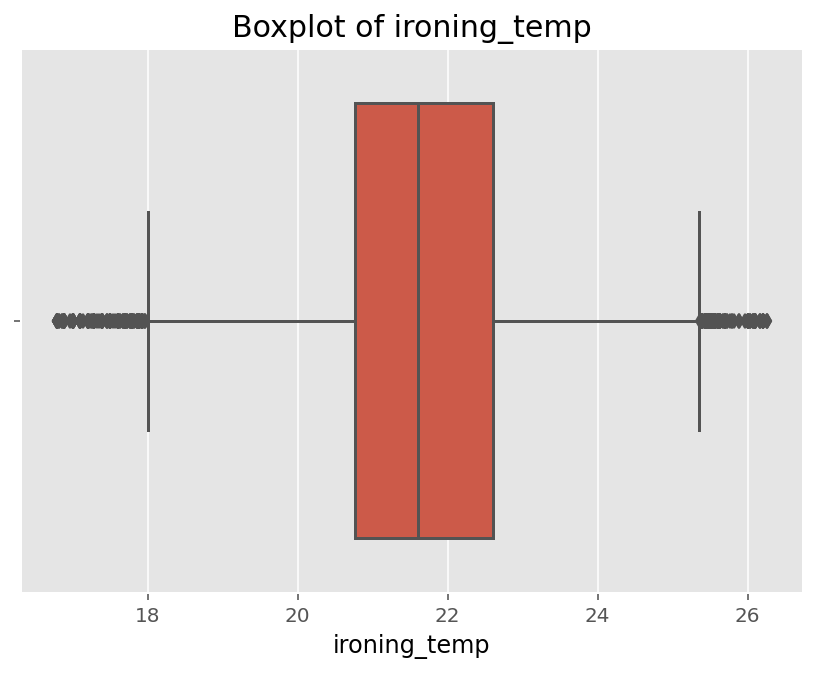

Number of "ironing_temp" outliers: 157


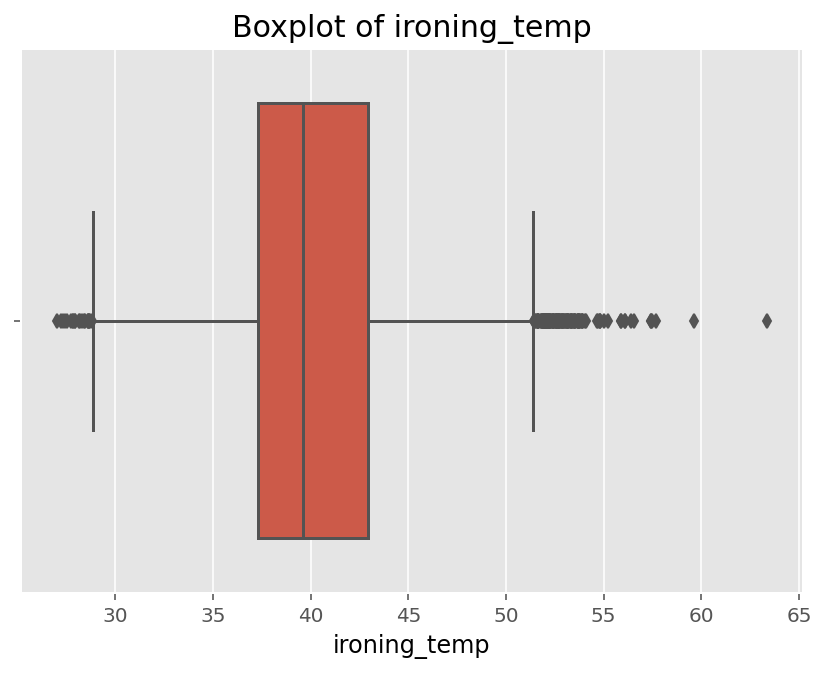

Number of "ironing_temp" outliers: 471


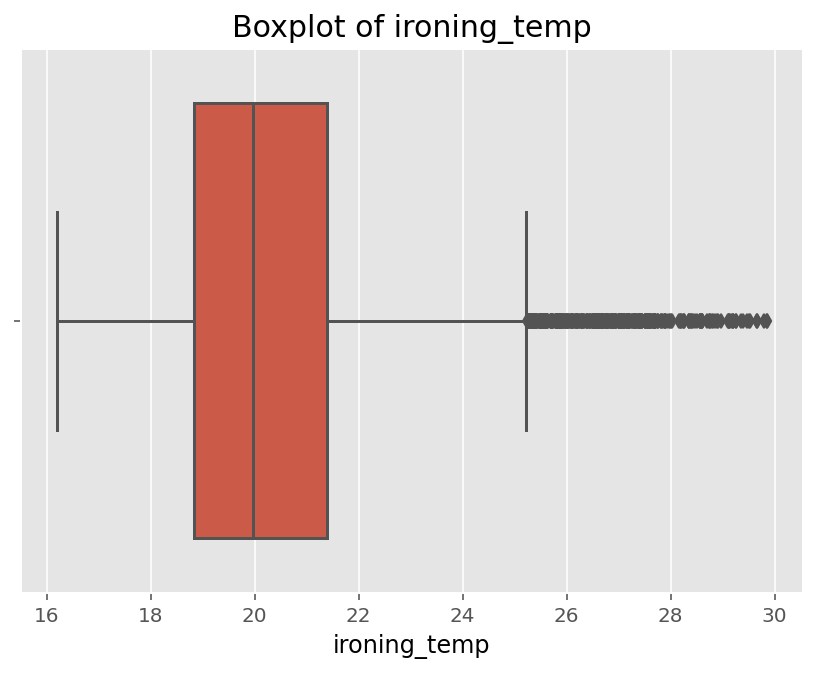

Number of "ironing_temp" outliers: 97


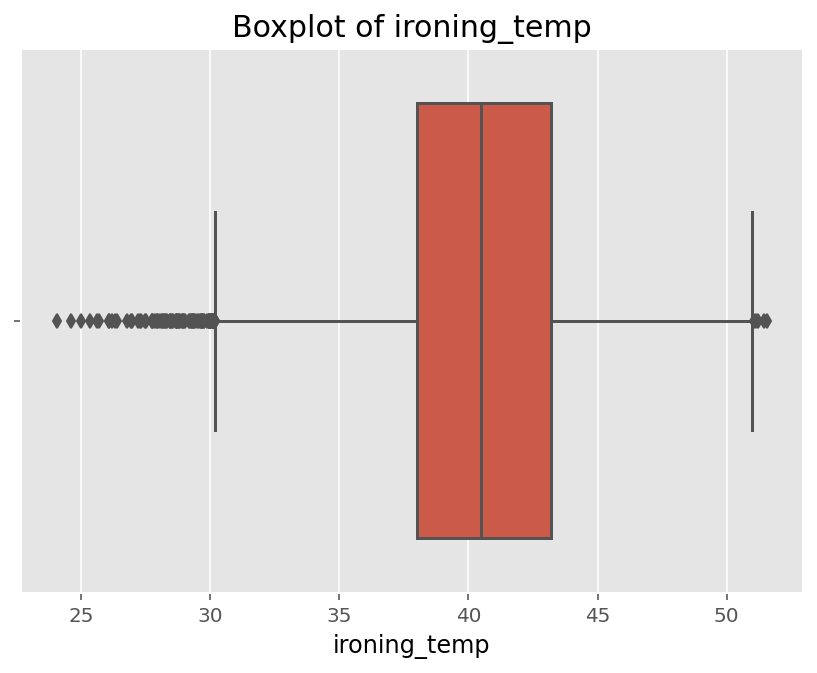

Number of "ironing_temp" outliers: 77


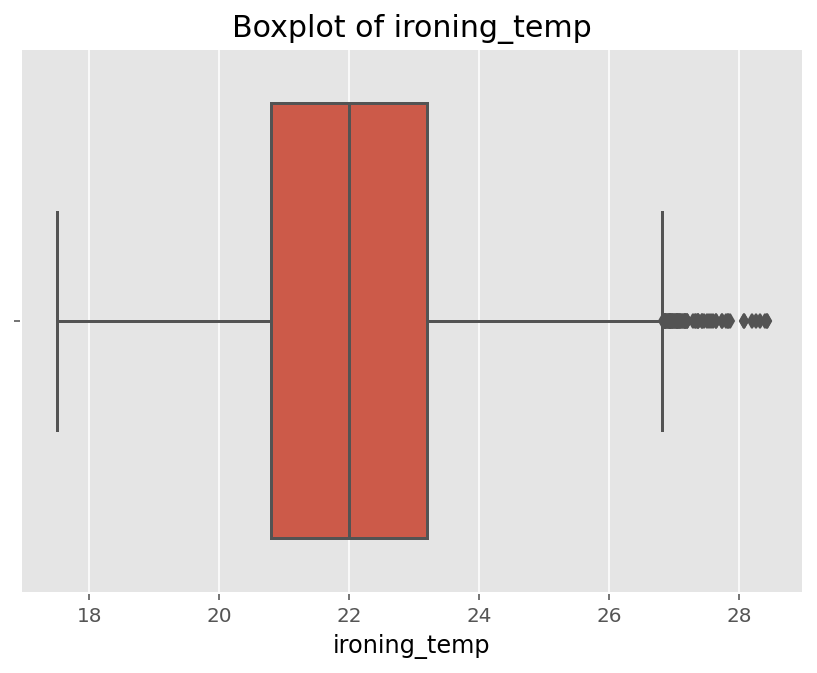

Number of "ironing_temp" outliers: 17


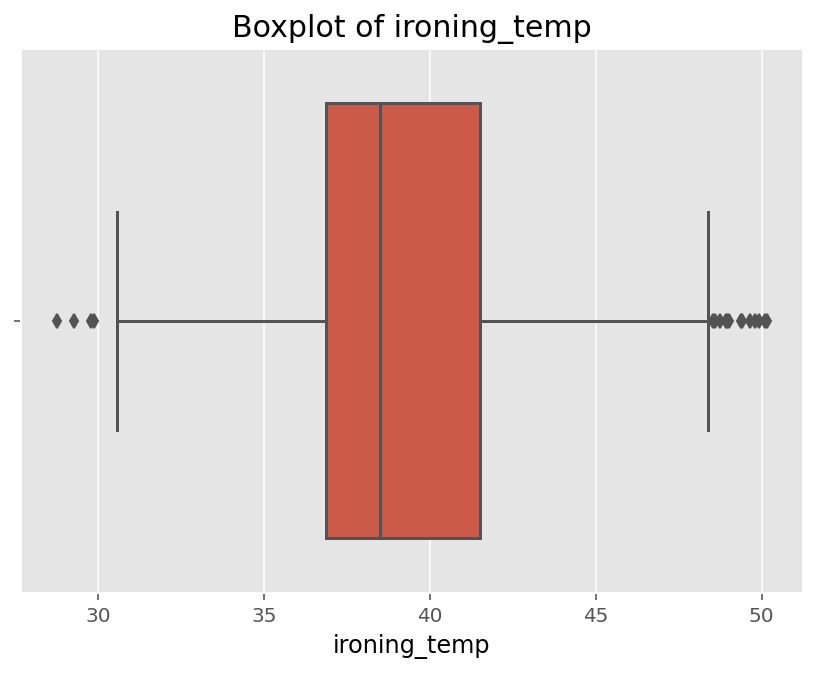

Number of "ironing_temp" outliers: 203


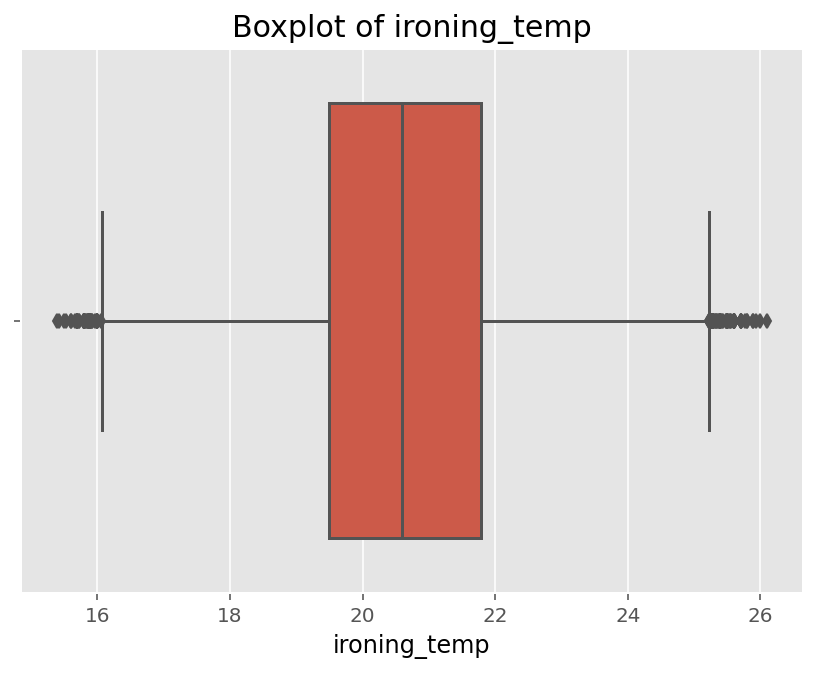

Number of "ironing_temp" outliers: 0


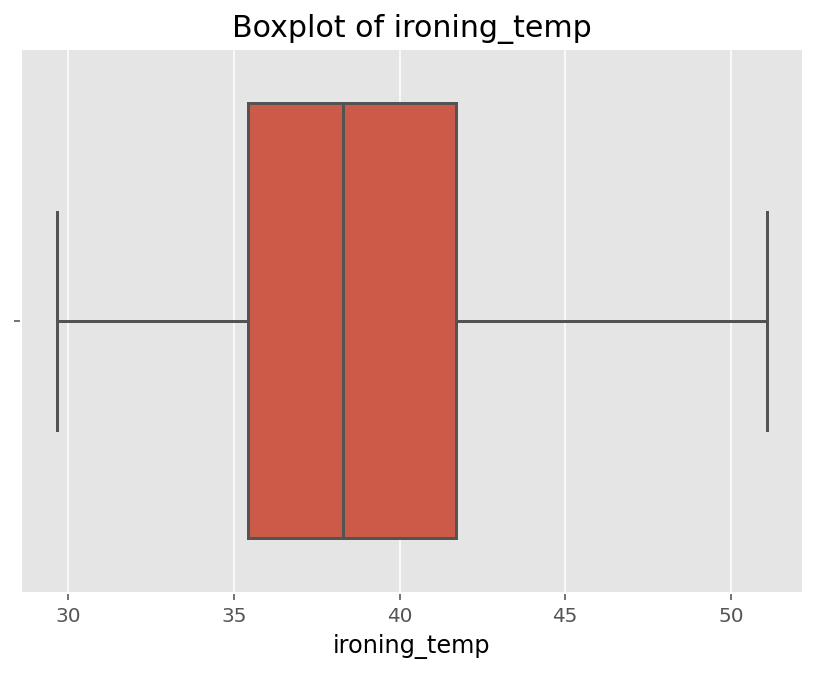

Number of "ironing_temp" outliers: 336


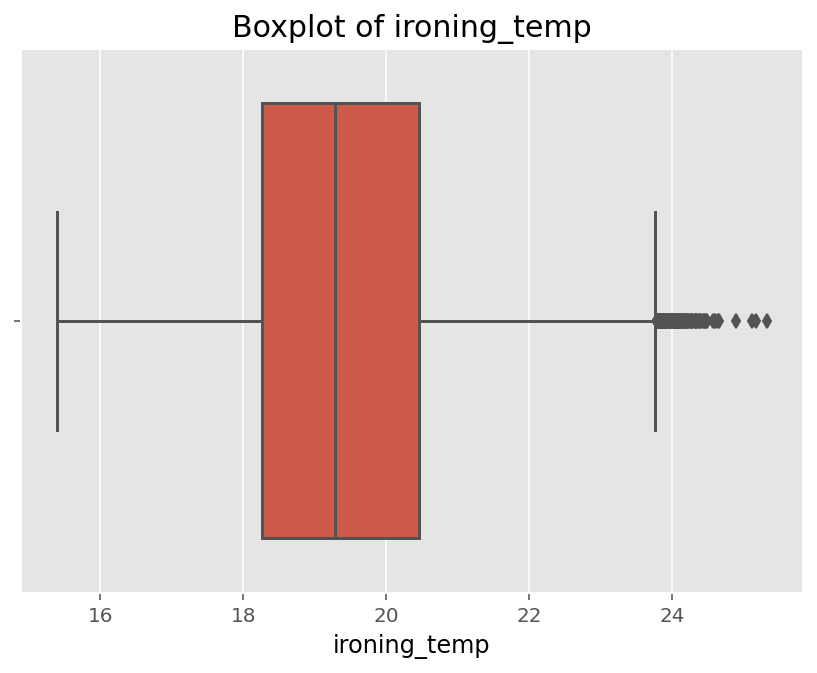

Number of "ironing_temp" outliers: 1177


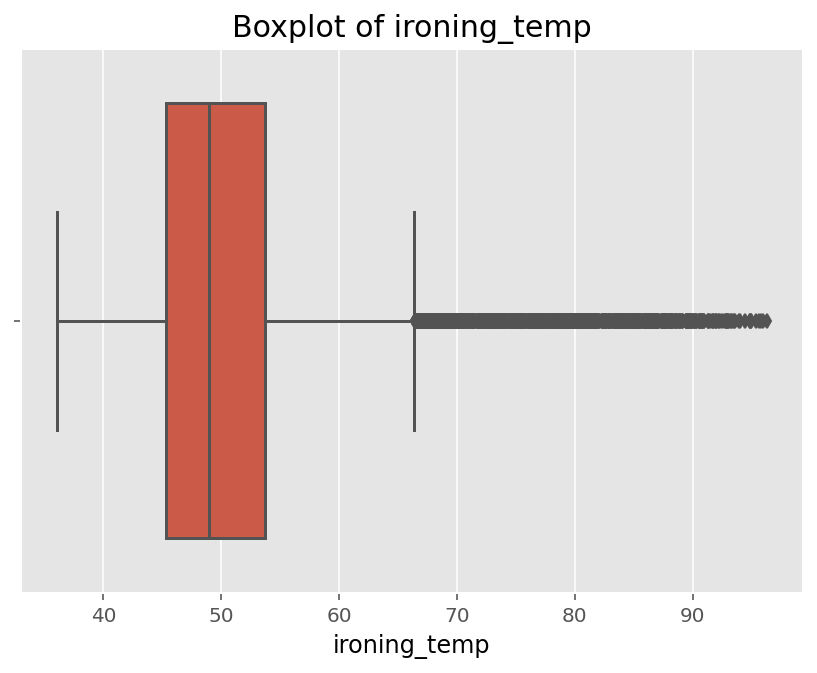

Number of "ironing_temp" outliers: 153


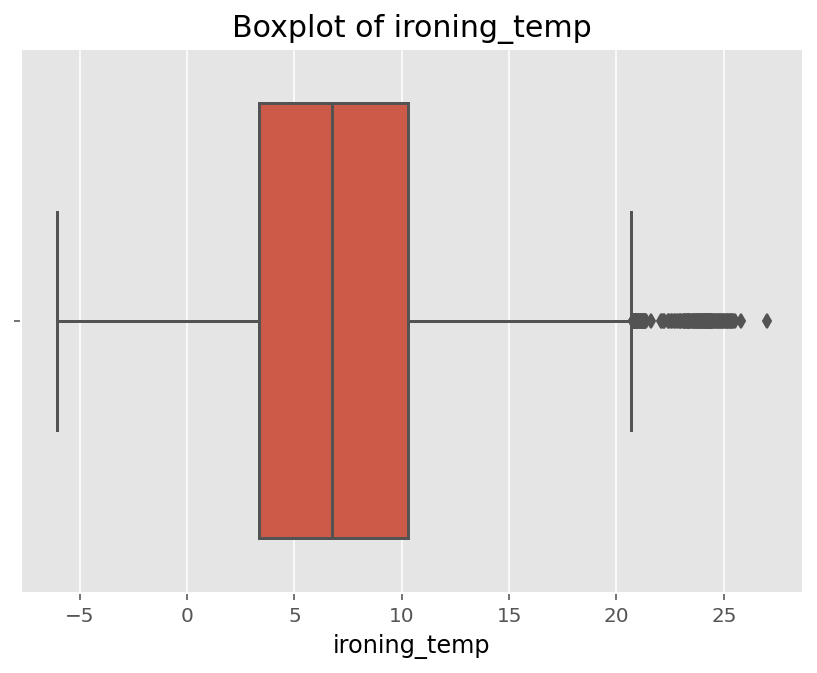

Number of "ironing_temp" outliers: 0


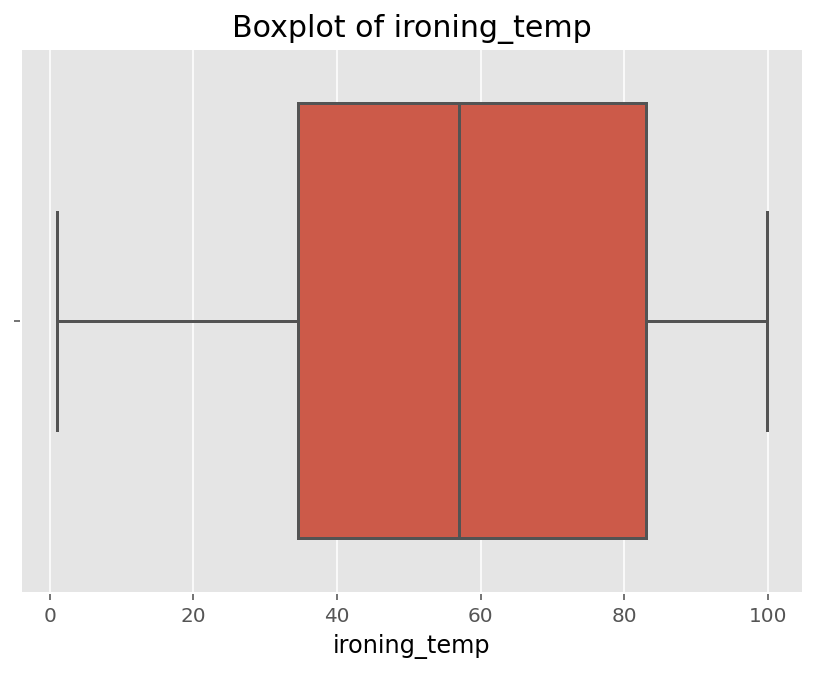

Number of "ironing_temp" outliers: 0


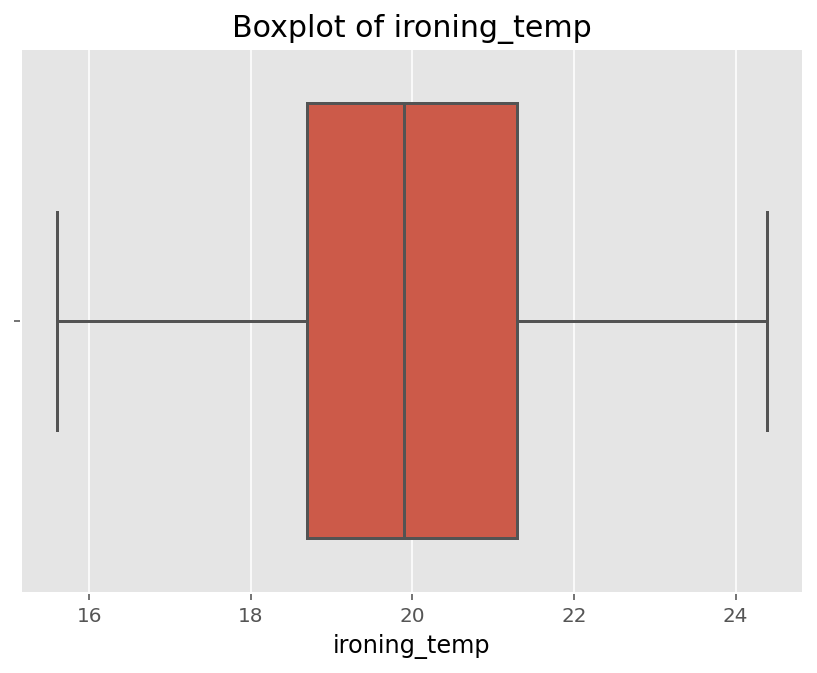

Number of "ironing_temp" outliers: 74


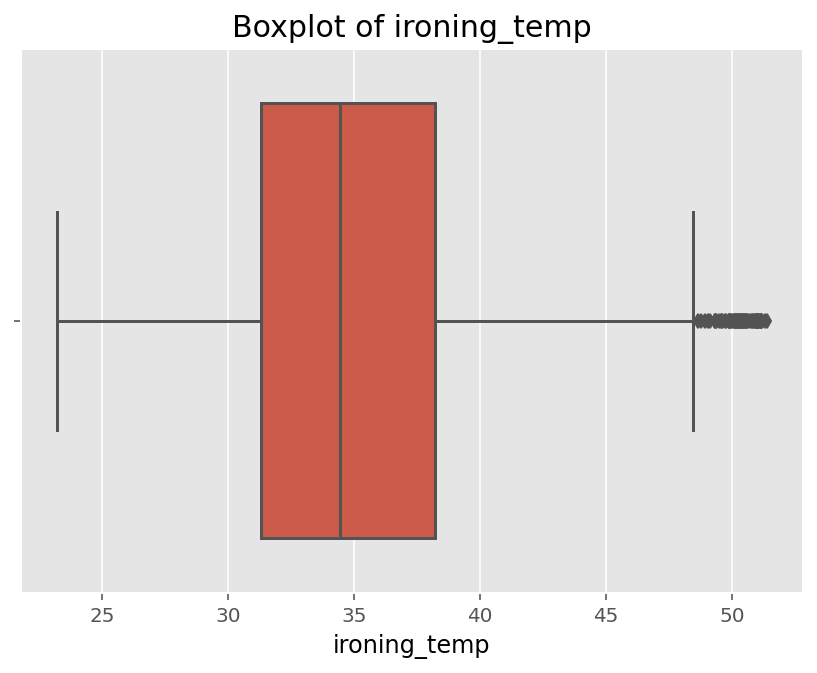

Number of "ironing_temp" outliers: 8


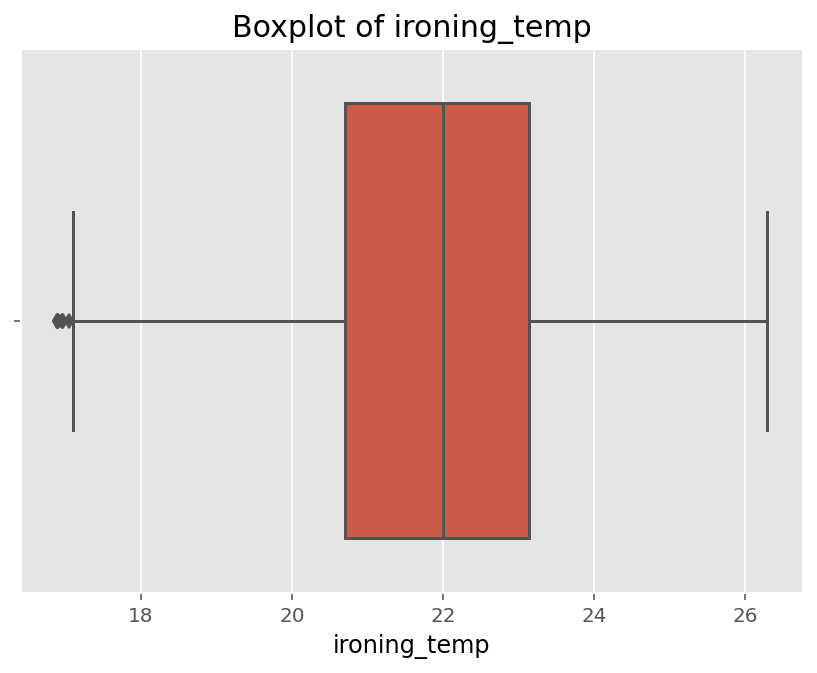

Number of "ironing_temp" outliers: 50


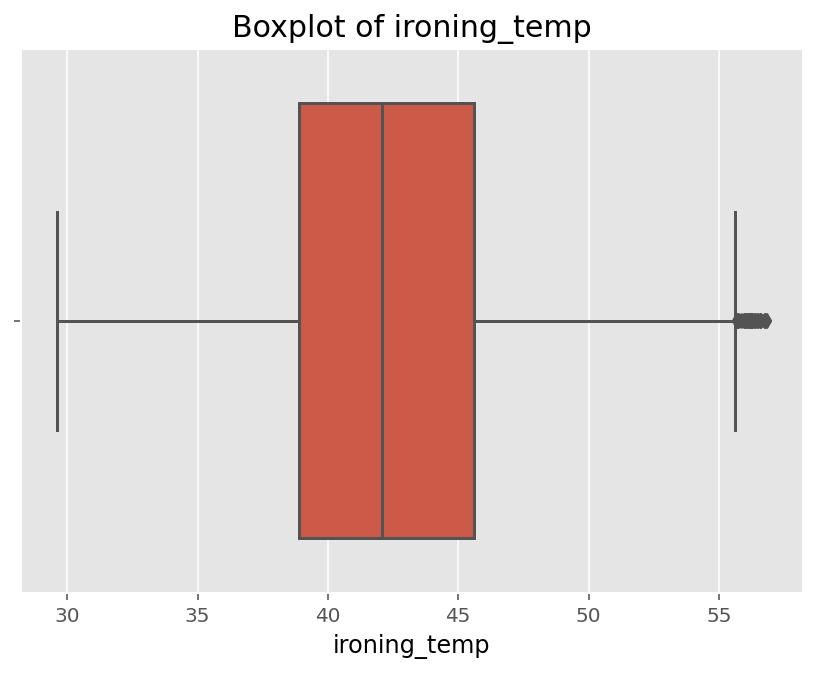

Number of "ironing_temp" outliers: 7


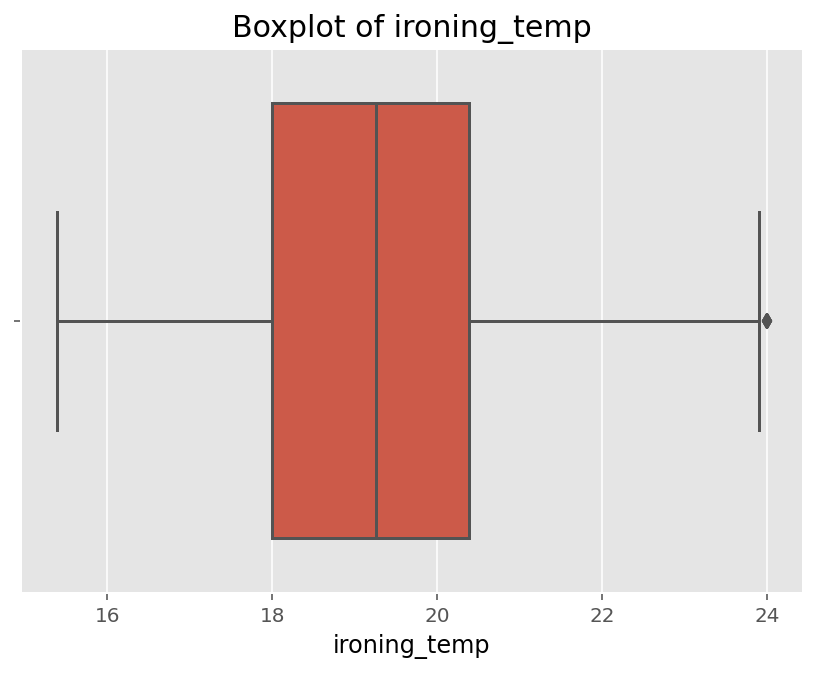

Number of "ironing_temp" outliers: 39


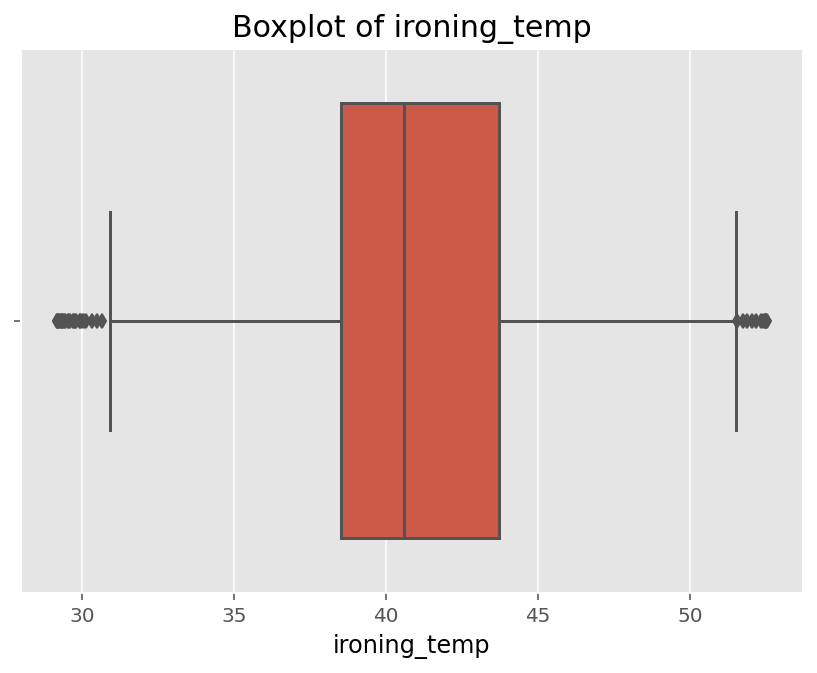

Number of "ironing_temp" outliers: 15


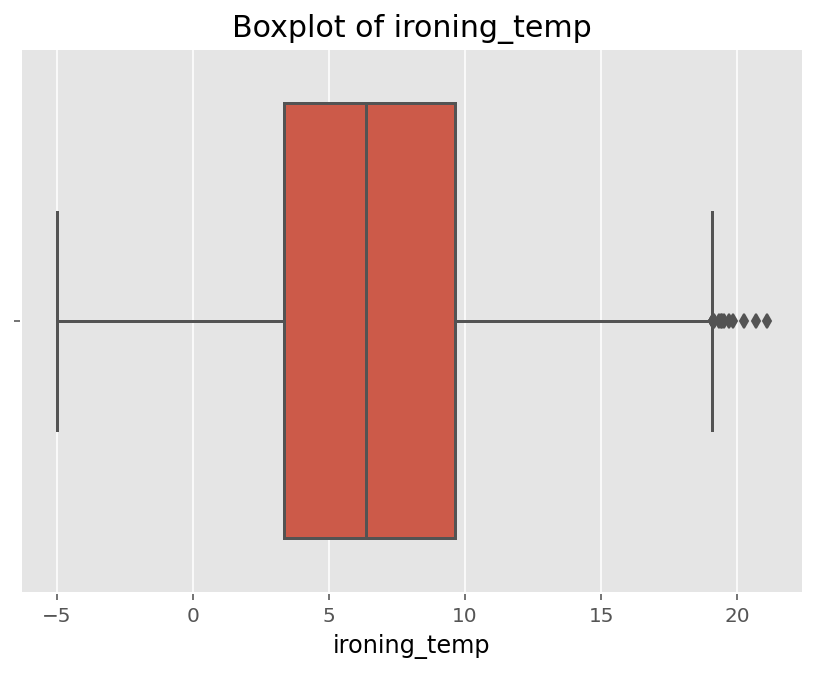

Number of "ironing_temp" outliers: 215


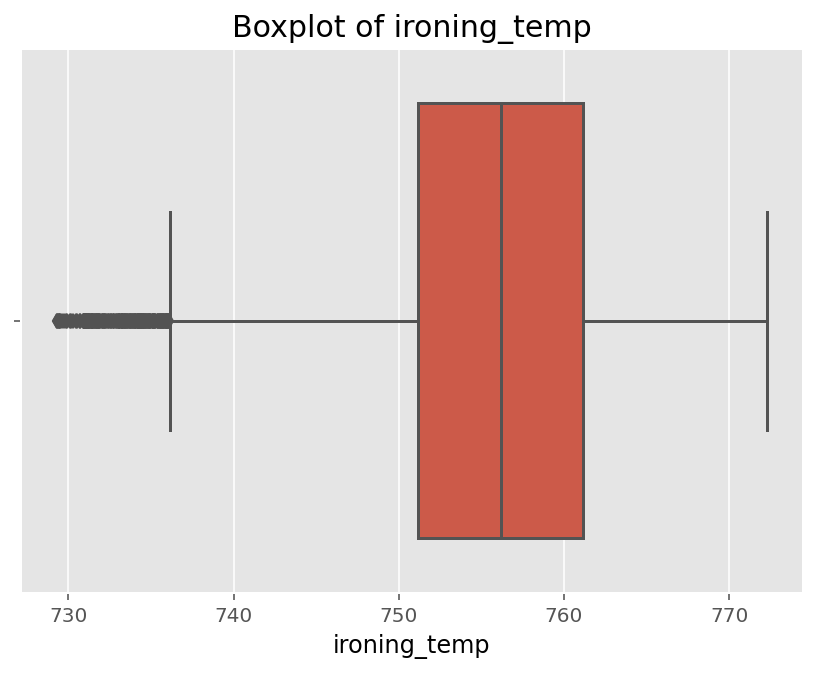

Number of "ironing_temp" outliers: 97


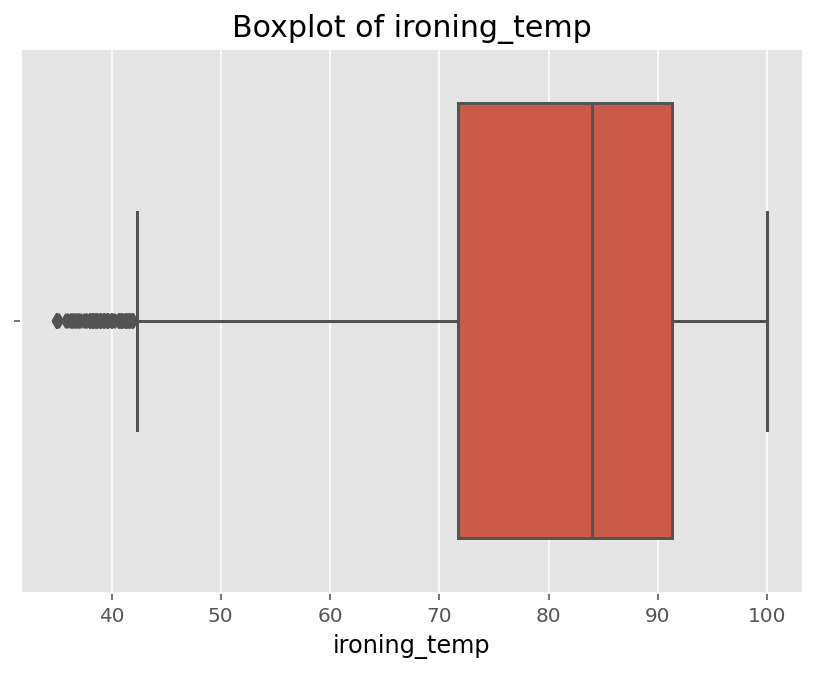

Number of "ironing_temp" outliers: 168


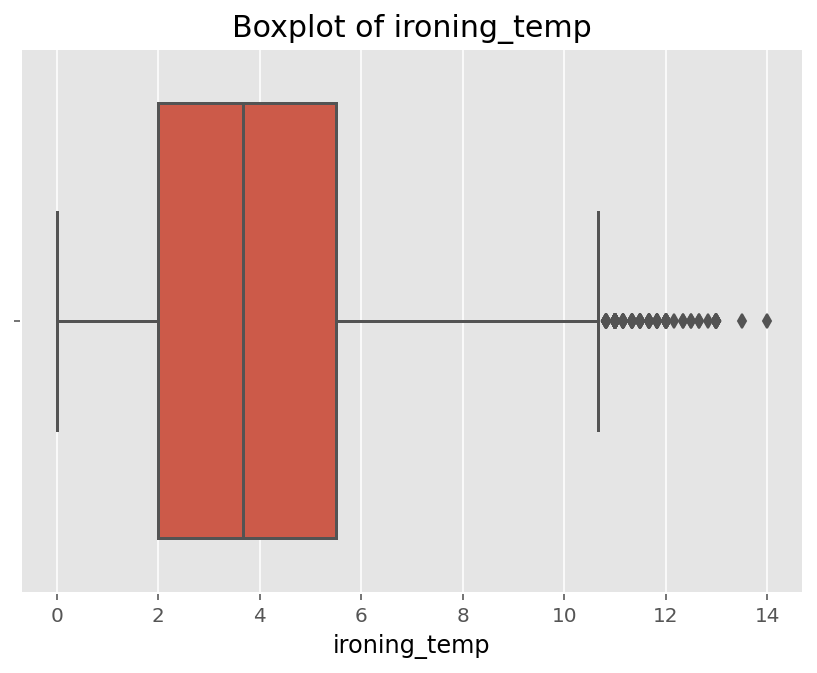

Number of "ironing_temp" outliers: 2130


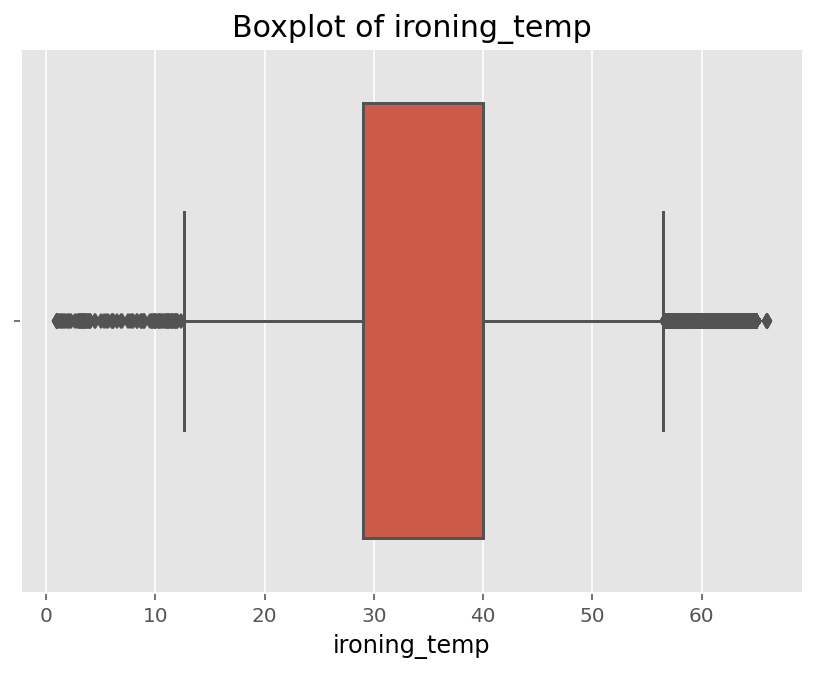

Number of "ironing_temp" outliers: 23


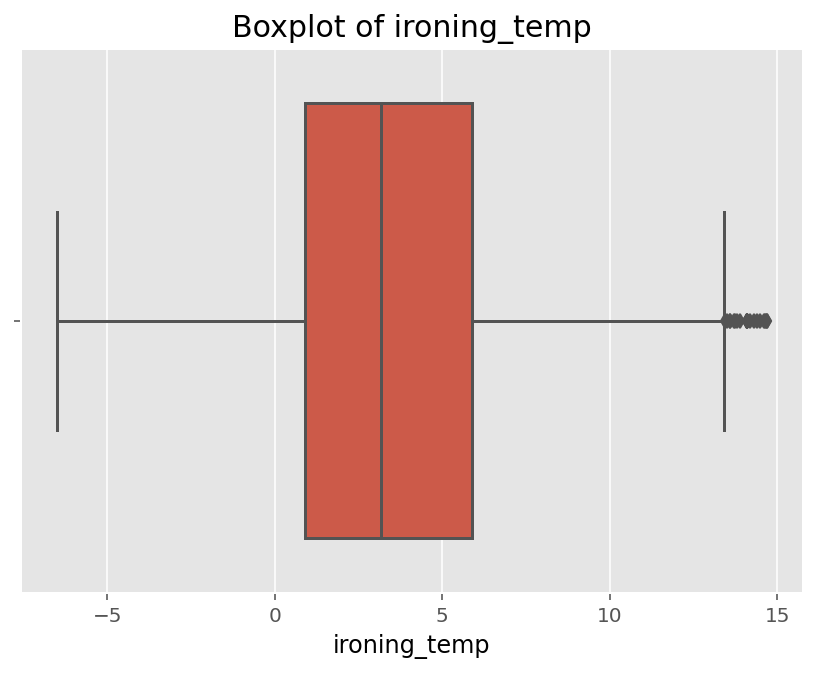

In [195]:
# Calling the outliers function for getting the outliers for different attributes 
df = func(df,'kitchen_temp')
df = func(df,'kitchen_humid')
df = func(df,'living_temp')
df = func(df,'living_humid')
df = func(df,'laundry_temp')
df = func(df,'laundry_humid')
df = func(df,'office_temp')
df = func(df,'office_humid')
df = func(df,'bathroom_temp')
df = func(df,'bathroom_humid')
df = func(df,'out_north_temp')
df = func(df,'out_north_humid')
df = func(df,'ironing_temp')
df = func(df,'ironing_humid')
df = func(df,'teen2_temp')
df = func(df,'teen2_humid')
df = func(df,'parent_temp')
df = func(df,'parent_humid')
df = func(df,'t_out')
df = func(df,'press_mm_hg')
df = func(df,'humid_out')
df = func(df,'windspeed')
df = func(df,'visibility')
df = func(df,'tdewpoint')

In [196]:
print(f"Shape of the dataset = {df.shape} \n") # displaying the shape of the dataset after removal of outliers

Shape of the dataset = (13706, 29) 



In [197]:
#summary of the dataset attributes
from IPython.display import display, HTML
display(HTML('<b>Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
kitchen_temp,13706.0,21.539036,1.288406,18.000000,20.790000,21.507143,22.390000,25.300000
kitchen_humid,13706.0,39.898988,3.436678,31.426667,37.300000,39.400000,42.363333,51.330000
living_temp,13706.0,20.035746,1.658549,16.200000,18.856667,19.862500,21.100000,25.230000
living_humid,13706.0,40.360111,3.524563,30.200000,37.900000,40.300000,43.000000,51.000000
laundry_temp,13706.0,22.146719,1.639449,18.000000,20.827500,22.100000,23.133333,26.790000
laundry_humid,13706.0,38.960312,3.027467,31.633333,36.790000,38.290000,40.700000,48.390000
office_temp,13706.0,20.732803,1.638029,16.100000,19.600000,20.633333,21.823333,24.890000
office_humid,13706.0,38.568887,3.964549,30.723333,35.363333,38.130000,41.067292,51.063333
bathroom_temp,13706.0,19.390188,1.503504,15.390000,18.200000,19.290000,20.390000,23.760000
bathroom_humid,13706.0,48.982534,5.585387,36.700000,45.000000,48.163333,52.477857,66.393333


In [198]:
# To get the correlation attributes w.r.t. other attributes and the target variable
cor = df.corr()
cor

,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bathroom_temp,bathroom_humid,out_north_temp,out_north_humid,ironing_temp,ironing_humid,teen2_temp,teen2_humid,parent_temp,parent_humid,t_out,press_mm_hg,humid_out,windspeed,visibility,tdewpoint,rv1,rv2,target_energy,month,hour
kitchen_temp,1.000000,0.049326,0.778035,-0.012770,0.850724,-0.101259,0.803215,0.024065,0.828257,-0.123827,0.533019,-0.562875,0.772864,0.027164,0.775912,-0.091427,0.785003,-0.035048,0.568882,-0.005580,-0.209954,-0.120898,0.077412,0.497383,-0.009947,-0.009947,0.048702,0.630854,0.179516
kitchen_humid,0.049326,1.000000,0.228390,0.796872,0.127217,0.837492,-0.017512,0.870023,0.088329,0.433158,0.282121,0.323288,-0.131541,0.754208,-0.177703,0.677157,-0.019086,0.726424,0.325583,-0.270914,0.245741,0.265583,0.063609,0.557049,-0.009779,-0.009779,0.086181,-0.215784,0.030499
living_temp,0.778035,0.228390,1.000000,-0.166178,0.614197,0.115168,0.652922,0.223252,0.595220,-0.041735,0.710342,-0.498120,0.525757,0.150059,0.458366,0.005055,0.548981,0.090879,0.698987,-0.022721,-0.413728,0.092510,0.092689,0.500564,-0.013068,-0.013068,0.113784,0.379154,0.292804
living_humid,-0.012770,0.796872,-0.166178,1.000000,0.147817,0.649794,-0.065806,0.711464,0.130981,0.374294,0.042633,0.378929,-0.080280,0.683927,-0.083558,0.645577,0.050884,0.652227,0.108611,-0.248640,0.527495,0.086901,0.011091,0.511802,-0.001847,-0.001847,-0.060154,-0.086226,-0.187482
laundry_temp,0.850724,0.127217,0.614197,0.147817,1.000000,-0.112368,0.775107,0.023556,0.857172,-0.155371,0.569942,-0.605195,0.786761,0.046819,0.749913,-0.057563,0.866761,0.019494,0.587762,-0.056288,-0.138247,-0.143819,0.057875,0.574016,-0.007992,-0.007992,0.069315,0.750120,0.014134
laundry_humid,-0.101259,0.837492,0.115168,0.649794,-0.112368,1.000000,-0.229981,0.891047,-0.149975,0.542512,0.027180,0.575651,-0.359819,0.818205,-0.399447,0.800728,-0.304992,0.834895,0.089930,-0.220590,0.314328,0.314014,0.036290,0.332502,-0.009177,-0.009177,0.034244,-0.514322,-0.067983
office_temp,0.803215,-0.017512,0.652922,-0.065806,0.775107,-0.229981,1.000000,-0.151924,0.821645,-0.212753,0.537701,-0.660126,0.812634,-0.072259,0.721603,-0.182252,0.835727,-0.149808,0.549438,0.094331,-0.258503,-0.247432,0.034312,0.438542,-0.002512,-0.002512,0.023651,0.731286,0.056608
office_humid,0.024065,0.870023,0.223252,0.711464,0.023556,0.891047,-0.151924,1.000000,-0.003841,0.483477,0.232478,0.447662,-0.253161,0.865415,-0.283981,0.800727,-0.150147,0.830529,0.284035,-0.240188,0.314144,0.344551,0.048745,0.555885,-0.007627,-0.007627,0.011068,-0.356257,-0.015112
bathroom_temp,0.828257,0.088329,0.595220,0.130981,0.857172,-0.149975,0.821645,-0.003841,1.000000,-0.154424,0.524430,-0.611238,0.830676,0.038859,0.780730,-0.070928,0.903066,-0.040206,0.547770,-0.040899,-0.126812,-0.199781,0.069507,0.532108,-0.011746,-0.011746,-0.024821,0.772856,0.009923
bathroom_humid,-0.123827,0.433158,-0.041735,0.374294,-0.155371,0.542512,-0.212753,0.483477,-0.154424,1.000000,-0.144711,0.409990,-0.262163,0.487601,-0.221744,0.522733,-0.253326,0.469796,-0.098507,-0.163157,0.250600,0.182811,-0.006329,0.073597,-0.006679,-0.006679,-0.054333,-0.356579,-0.063014


In [199]:
# checking for significant attributes
threshold = 0.05
a = abs(cor['target_energy'])
result = a[a>threshold]
result

kitchen_humid      0.086181
living_temp        0.113784
living_humid       0.060154
laundry_temp       0.069315
bathroom_humid     0.054333
out_north_temp     0.109339
out_north_humid    0.055255
ironing_humid      0.086584
teen2_humid        0.126197
parent_humid       0.062191
t_out              0.081808
humid_out          0.153312
windspeed          0.095766
target_energy      1.000000
month              0.051892
hour               0.228939
Name: target_energy, dtype: float64

In [200]:
# Removing insignificant attributes
df = df.drop(['kitchen_temp', 'laundry_humid', 'office_temp', 'office_humid', 'bathroom_temp', 'ironing_temp', 'teen2_temp', 'parent_temp', 'press_mm_hg', 'visibility', 'tdewpoint', 'rv1', 'rv2'],1)
df.shape

(13706, 16)

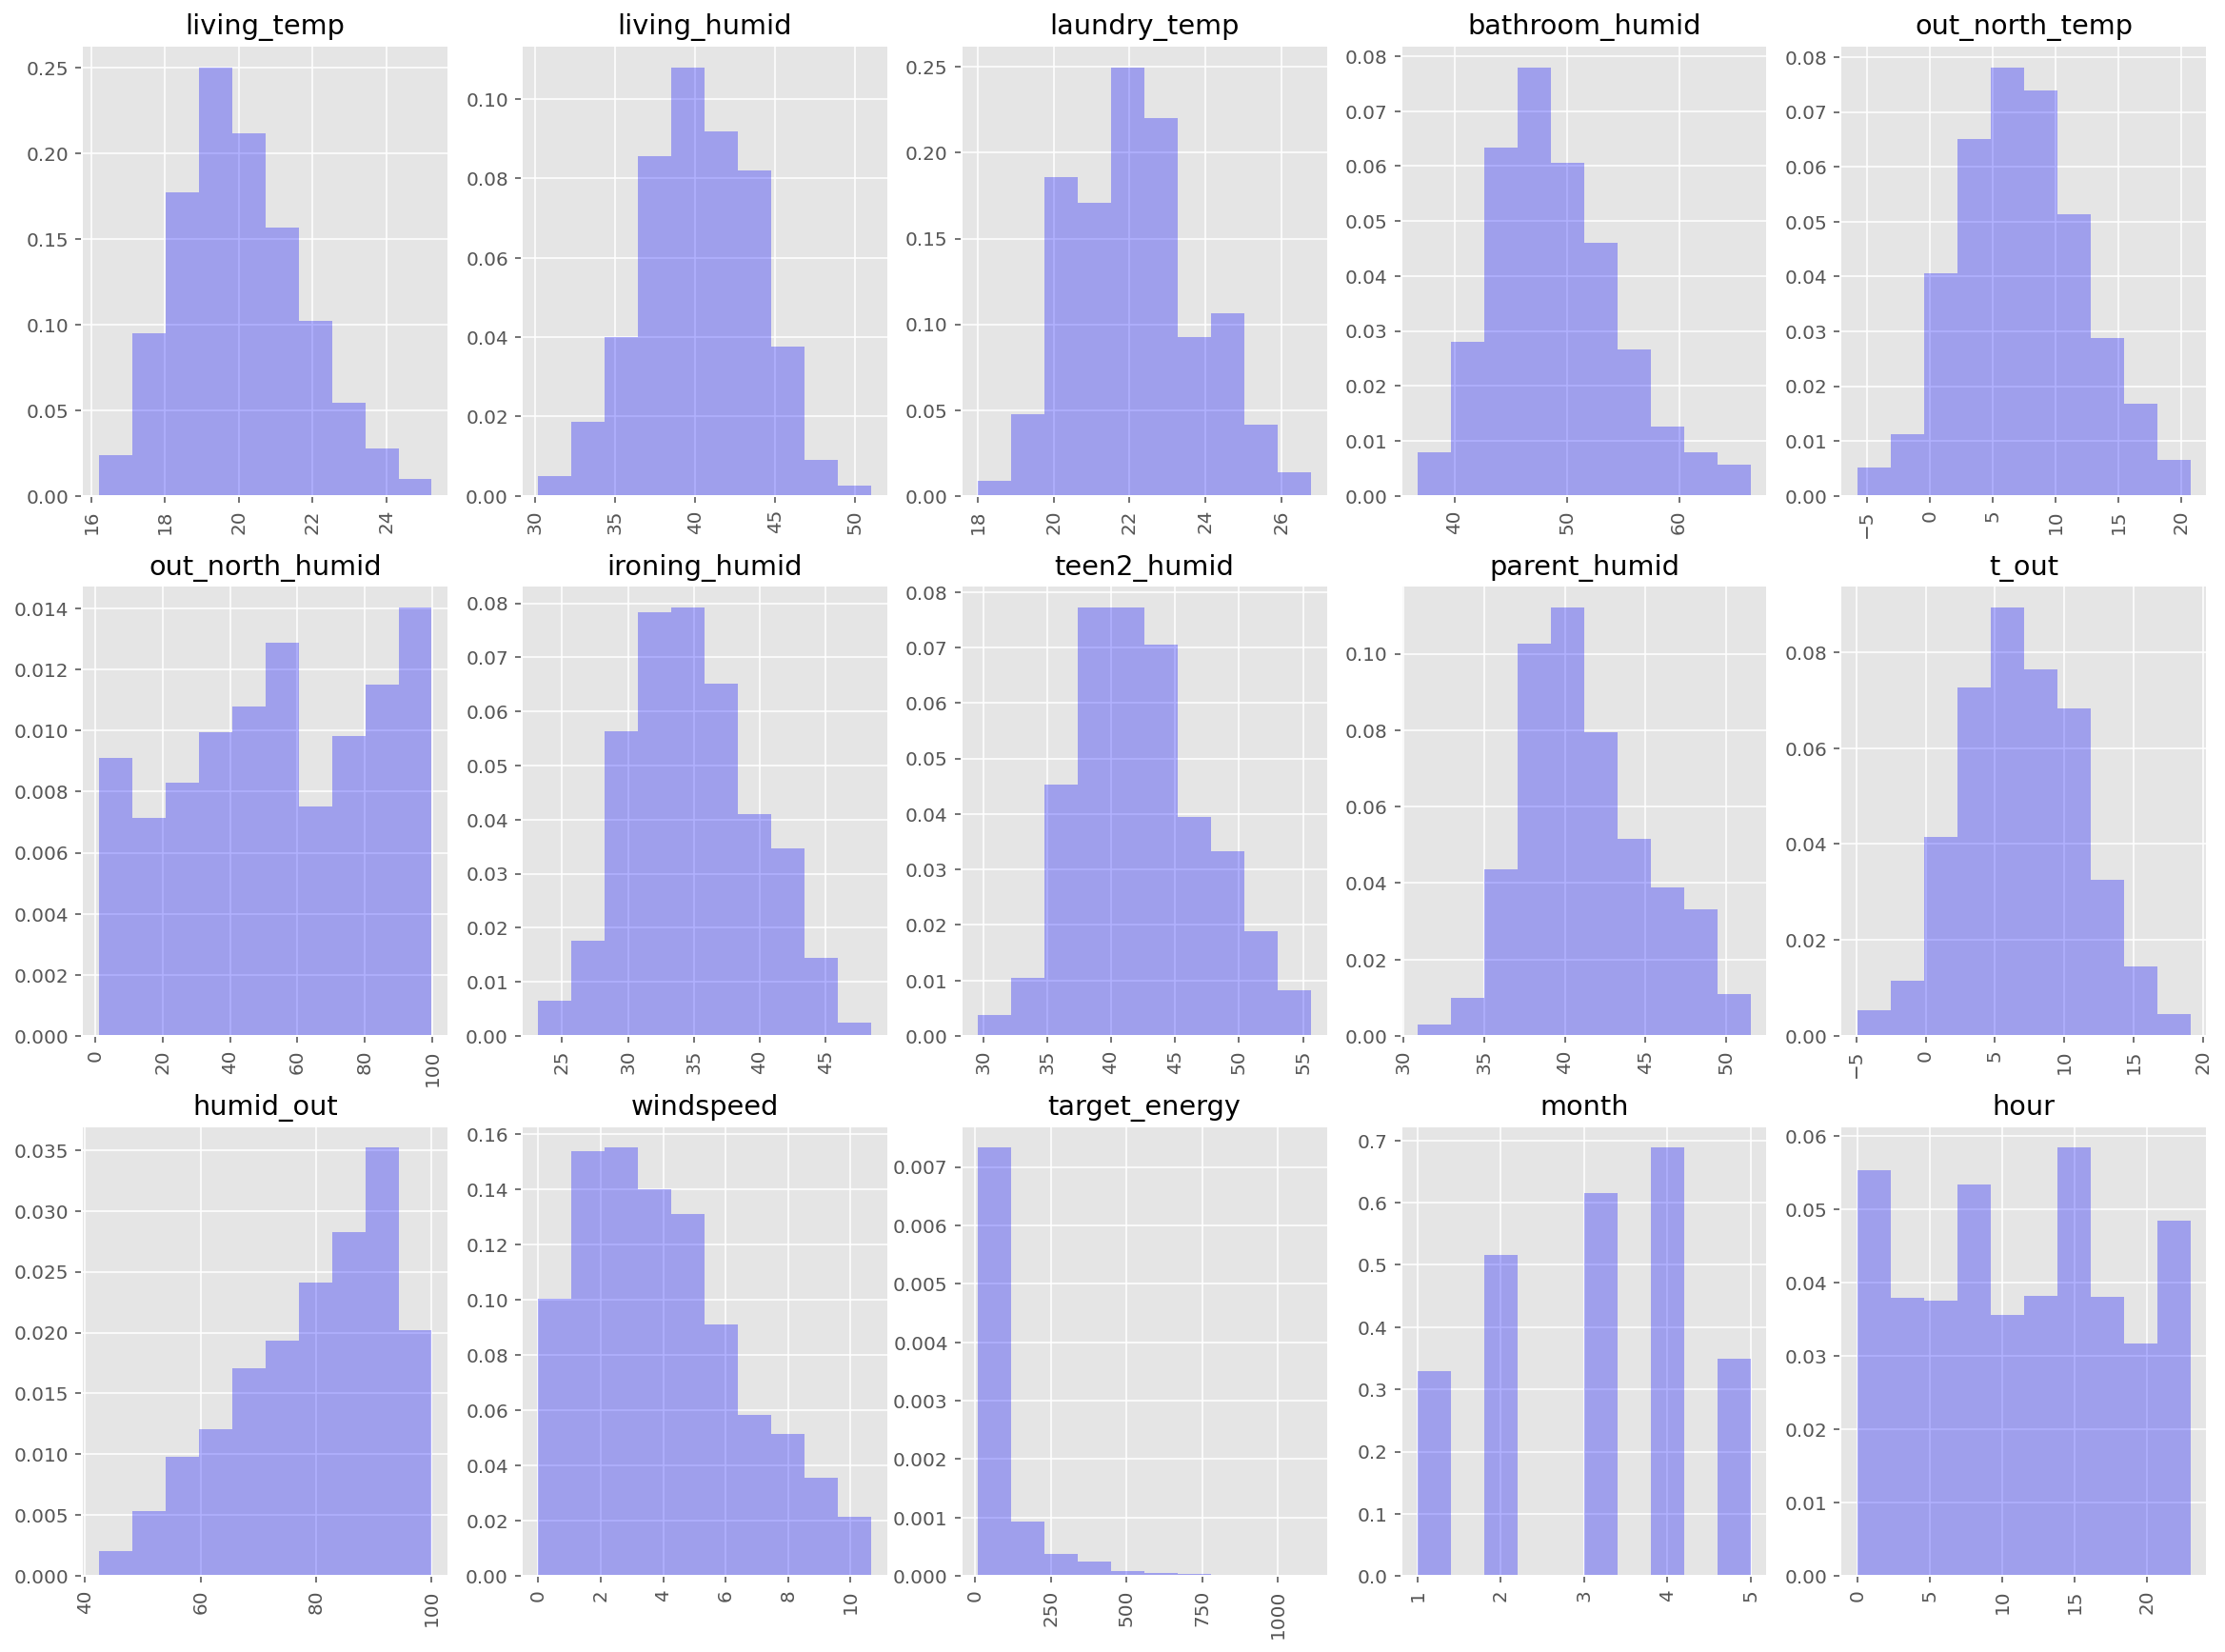

In [201]:
# histogram plot for checking trend of attributes
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns[1:21]):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

[Text(0.5, 0, 'kitchen_humid'),
 Text(1.5, 0, 'living_temp'),
 Text(2.5, 0, 'living_humid'),
 Text(3.5, 0, 'laundry_temp'),
 Text(4.5, 0, 'bathroom_humid'),
 Text(5.5, 0, 'out_north_temp'),
 Text(6.5, 0, 'out_north_humid'),
 Text(7.5, 0, 'ironing_humid'),
 Text(8.5, 0, 'teen2_humid'),
 Text(9.5, 0, 'parent_humid'),
 Text(10.5, 0, 't_out'),
 Text(11.5, 0, 'humid_out'),
 Text(12.5, 0, 'windspeed'),
 Text(13.5, 0, 'target_energy'),
 Text(14.5, 0, 'month'),
 Text(15.5, 0, 'hour')]

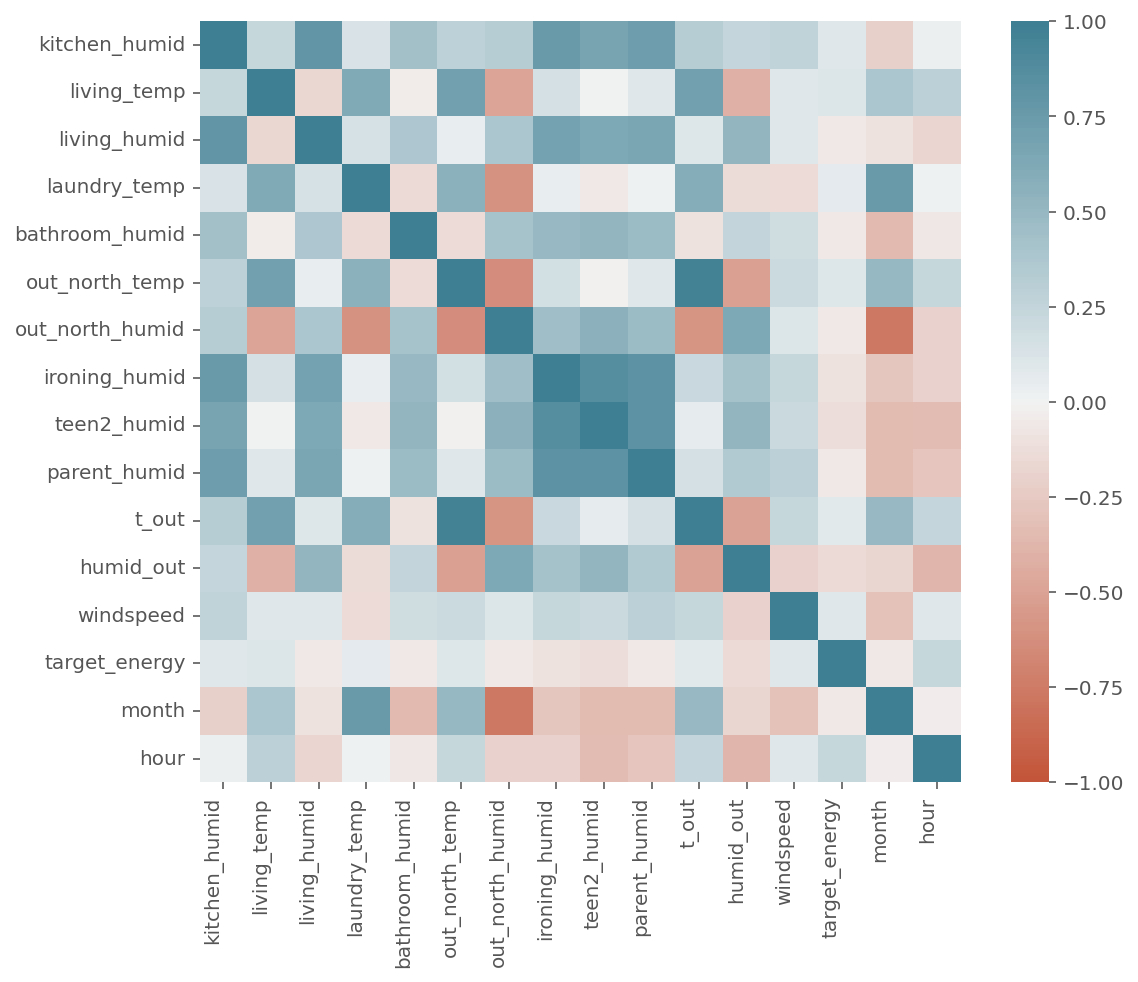

In [202]:
# Heatmap to determine the correation of attributes
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 7))
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

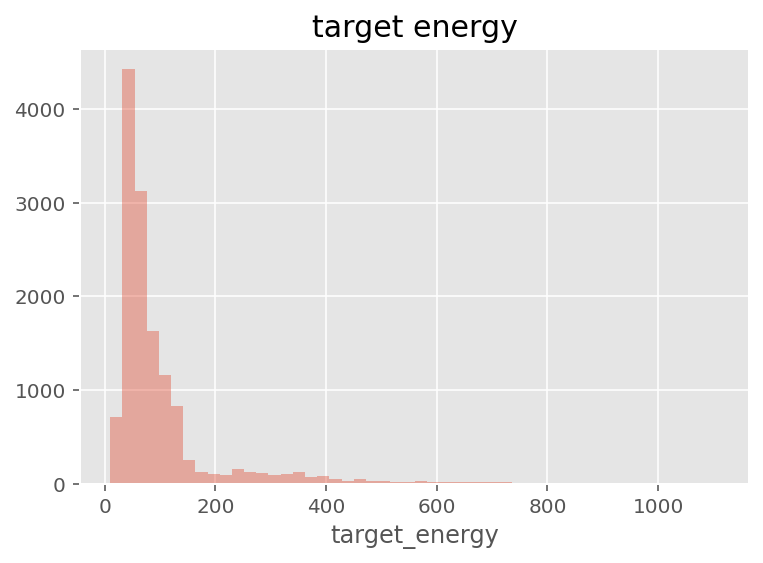

In [203]:
# Plot for observing the target attribute
sns.distplot(df['target_energy'], kde = False).set_title('target energy', fontsize = 15)
plt.show()